# Übung: Die FEM des Dehnstabes

$
\newcommand{\MtdFull}[1]{\frac{D \, #1}{D \, t}}
\newcommand{\Pd}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\d}{\text{d} }
\newcommand{\Dd}[2]{\frac{\d #1}{\d #2}}
\newcommand{\dt}[1]{#1 ^{\bullet}}
\newcommand{\dV}{\; \text{d}V}
\newcommand{\dA}{\; \text{d}A}
\newcommand{\dx}{\; \text{ d}x}
\newcommand{\dy}{\; \text{ d}y}
\newcommand{\dz}{\; \text{ d}z}
\newcommand{\dxi}{\; \text{ d}\xi}
\newcommand{\deta}{\; \text{ d}\eta}
\newcommand{\dzeta}{\; \text{ d}\zeta}
\newcommand{\grad}[1]{\text{grad}\left(#1\right)}
\renewcommand{\div}[1]{\text{div} \left(#1\right)}
\newcommand{\td}[1]{\dot{#1}}
\newcommand{\tdd}[1]{\ddot{#1}}
\newcommand{\T}{\rp{T}}
\newcommand{\rp}[1]{^{\text{#1}}}
\newcommand{\rs}[1]{_{\text{#1}}}
\renewcommand{\bm}[1]{\boldsymbol{#1}}
\newcommand{\e}{\epsilon}
\newcommand{\eb}{\bm{\e}}
\newcommand{\s}{\sigma}
\newcommand{\sb}{\bm{\sigma}}
$

Ausgangspunkt für die FEM des Stabes ist die starke Form der Differentialgleichung des Stabes:

```math
 {EA} u^{\prime \prime} =  - {n(x)} A \; .
```

Die analytische Lösung erhalten wir durch zweifache Integration und einsetzen der Randbedingungen:
$$  
  u(x) = \left( \frac{F}{EA} + \frac{n \ell}{E}\right)\cdot x - \frac{1}{2} \frac{n}{E} x^2 \; . 
  $$
Die Schnittkraft $N$ berechnet sich wie folgt:
  $$
  N(x) = F + n A (\ell-x). 
  $$

Die schwache Form erhält man durch Multiplikation mit einer Testfunktion $\delta u$ und parielle Integration:
```math
\begin{align}
 \int_{0}^{\ell} \delta \e \cdot E\e \, A \dx & = \left[\delta u \cdot \sigma A \right]_0^{\ell} + \int_0^{\ell} \delta u \cdot n(x) \dx\;  \\
 & = \left[ \delta u(\ell) \cdot F + \delta u(0) \cdot 0\right]+ \int_0^{\ell} \delta u \cdot n(x) \dx\; .
\end{align}
```


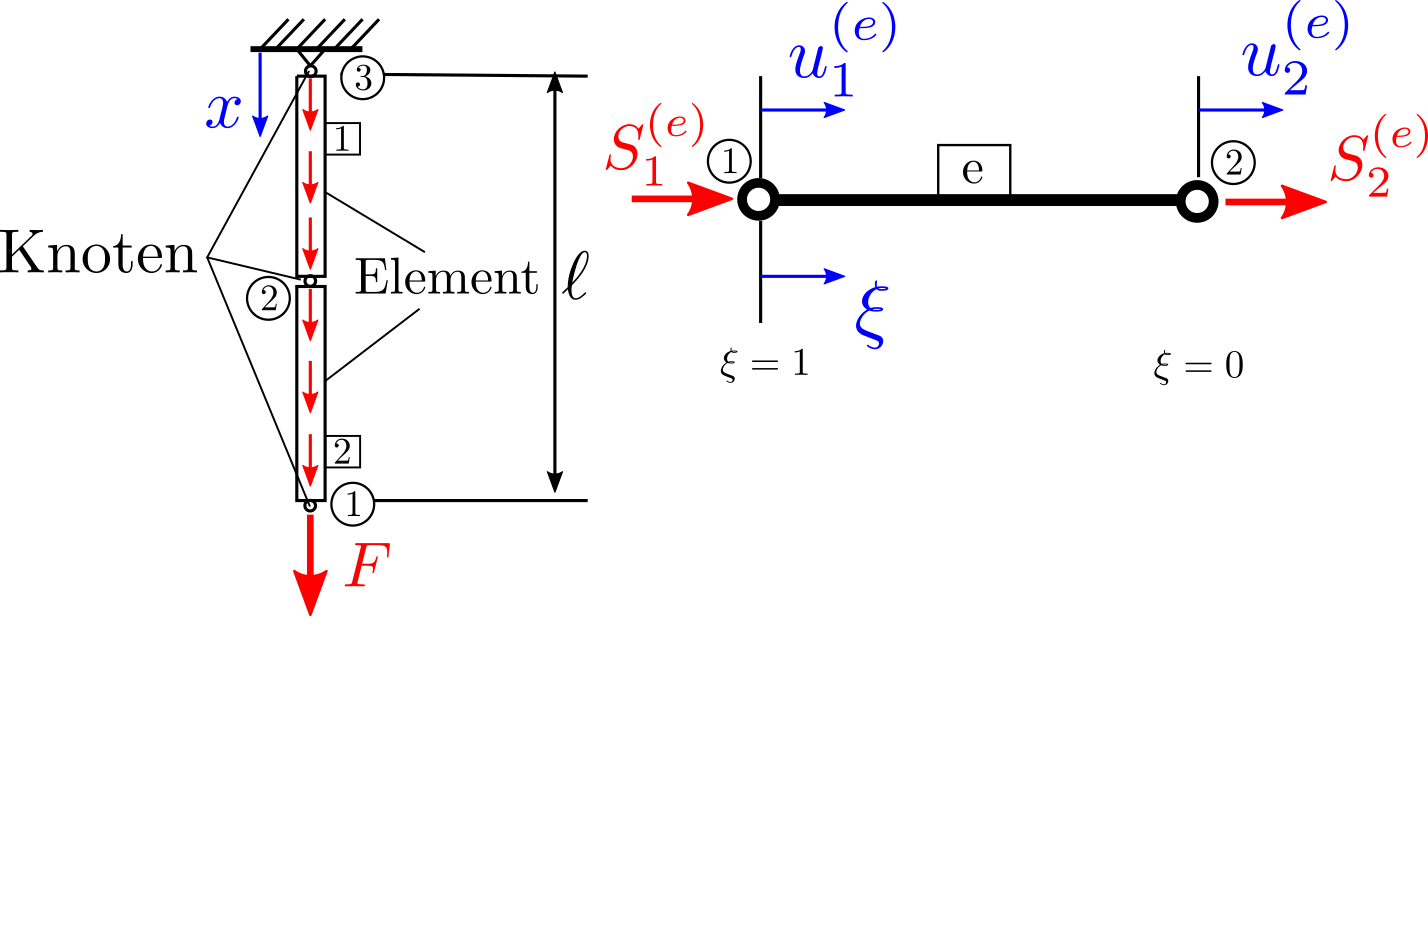

Das Stabelemet hat 2 lokale Knoten und um die Verschiebung an diesen Knoten eindeutig zuzuordnen verwenden wir die Notation:

$
u_1^{e} \text{ Verschiebung u am lokalen Knoten 1 von Element e}
$

$
u_2^{e} \text{ Verschiebung u am lokalen Knoten 2 von Element e}
$

Auf diesen Elementen werden dann einfache Ansatzfunktionen verwendet, welche eine lineare Approximation des Verschiebungsfeldes darstellen:

```math
\begin{align}
 N_1(\xi) & = (1-\xi) \qquad N_2(\xi)= \xi  \\
 u_h(\xi) & = N_1(\xi) u_1^{(e)}+ N_2(\xi) u_2^{(e)} \\
 u_h(\xi) & = \sum_{I=1}^2 N_I(\xi) u_I^{(e)}
 \end{align}
```

hierbei wurde das lokale Koordinatensystem $\xi = \frac{x}{\ell_e} \; \in \; [0,1]$  eingeführt, damit der gewählte Ansatz für alle Stabelmenete, unabhängig der Stablänge $\ell_e$ gültig ist. Setzt man diesen Ansatz in die schwache Form ein, so erhält man schließlich:

```math
\begin{align}
  {   \underbrace{\int_{0}^{1} EA \frac{1}{\ell_e} \begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}  \d \xi}_{\bm{K}^{(e)}} \begin{bmatrix} u_1^{(e)} \\ u_2^{(e)}\end{bmatrix}} 
 - { \underbrace{n \ell_e A \int_0^{1} \begin{bmatrix} (1-\xi) \\ \xi  \end{bmatrix}   \d \xi}_{\bm{F}_V^{(e)}}} - { \underbrace{\begin{bmatrix} S_1^{(e)} \\ S_2^{(e)} \end{bmatrix}}_{\bm{F}_K^{(e)}}}  & = 0\; \\
 {\bm{K}^{(e)} \bm{u}^{(e)}} &=  {\bm{F}_V^{(e)}} + {\bm{F}_K^{(e)} } 
\end{align}
```

Dabei ist $\bm{K}^{(e)}$ die **Elementsteifigkeitsmatrix**, $\bm{F}_V^{(e)}$ ist der **Vektor der äquivalenten Knotenkräfte** aus den verteilten Lasten und $\bm{F}_K^{(e)}$ sind die an den Knotenpunkten **eingeprägten Kräfte**.

```math
\begin{align}
 \bm{K}^{(e)} & = EA \frac{1}{\ell_e} \begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix} \\
 \bm{F}_V^{(e)} & = n \ell_e A  \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix} 
\end{align}
```

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


In [140]:
symbolic = True

if symbolic:
    # Symbolische Math-Methoden
    #
    def zeros(a,b):
        return sp.zeros(a,b)

    def ones(a,b):
        return sp.ones(a,b)

    def dotProduct(a,b):
        return a.dot(b)

    def sqrt(a):
        return sp.sqrt(a)

    def sign(a):
        return sp.sign(a)

    def shape(a):
        return sp.shape(a)
    
    def e_x():
        return sp.Matrix([[1],[0]])
    
    def e_y():
        return sp.Matrix([[0],[1]])

    def cos(a):
        return sp.cos(a)
    
    def sin(a):
        return sp.sin(a)

    def acos(a):
        return sp.acos(a)

    def matrix(a):
        return sp.Matrix(a)
    
else:
    # Numerische Math-Methoden
    #
    def zeros(a,b):
        return np.zeros((a,b))

    def ones(a,b):
        return np.ones((a,b))

    def dotProduct(a,b):
        return np.dot(a,b)

    def sqrt(a):
        return np.sqrt(a)
    
    def sign(a):
        return np.sign(a)

    def shape(a):
        return np.shape(a)

class StabFEM:
    
    def __init__(self,numnp=2,numel=1,dim=1):
        self.numnp = numnp
        self.numel = numel
        self.dim = dim
        self.numdof = self.numnp * self.dim
        self.elements = zeros(self.numel,2)
        self.eData = []
        self.coords = zeros(self.numnp,2)
        self.dof = zeros(self.numnp,dim)
        self.eqind = zeros(self.numnp,dim)
        self.Kges = zeros(self.numdof,self.numdof)
        self.Fges = zeros(self.numnp,dim)
        self.dirichletBC = None
        self.Kuu = self.Kud = self.Kdu = self.Kdd = None
        
        
    def setNodalCoordinates(self,X):
        for row in range(shape(X)[0]):
            for i in range(shape(X)[1]):
                self.coords[row,i] = X[row,i]
                
    def setElementConnectivity(self,IX):
        for row in range(shape(IX)[0]):
            for col in range(shape(IX)[1]):
                self.elements[row,col] = IX[row,col]
    
    def setElementData(self,areas,youngsmoduli,lineLoads):
        for i in range(self.numel):
            self.eData.append({"area":areas[i],"youngsmodulus":youngsmoduli[i],"lineLoad":lineLoads[i]})

    def setDirichletBoundaryCondition(self,dirichletNodes,dirichletDir,dirichletVal):
        eqID = 1
        for nodeID in range(self.numnp):
            for dirID in range(self.dim):
                self.eqind[nodeID,dirID] = eqID
                eqID +=1
        # Knoten an denen Dirichlet Randbedingungen vorgegeben werden
        # müssen im Gleichungssystem nicht berücksichtigt werden.
        # Deshalb erhalten sie negative Gleichungsnummern zur Identifikation
        
        self.dirichletBC = zeros(len(dirichletNodes),3)
        
        for i,(nodeID,dirId,dVal) in enumerate(zip(dirichletNodes,dirichletDir,dirichletVal)):
            self.eqind[nodeID,dirId] = -self.eqind[nodeID,dirId]
            self.dirichletBC[i,0] = nodeID
            self.dirichletBC[i,1] = dirID
            self.dirichletBC[i,2] = dVal
            self.dof[nodeID,dirId] = dVal

    def setExternalForces(self,neumannNodes,neumannDir,neumannVal):
        for nodeID,nDir,nVal in zip(neumannNodes,neumannDir,neumannVal):
            self.Fges[nodeID,nDir] = nVal

    def _getElementstiffness_(self,elID):
        director = self._getElementDirector(elID) 
        le = sqrt(dotProduct(director,director))
        Ke = self.eData[elID]["area"]*self.eData[elID]["youngsmodulus"]/le * ones(2,2)
        Ke[0,1]*=-1
        Ke[1,0]*=-1
        return Ke

    def assembleGlobalMatrix(self):
        if self.dim == 1:
            self._assembleGlobalMatrix1D()
        elif self.dim == 2 :
            self._assembleGlobalMatrix2D()
        else:
            raise Exception(f"Dimension {self.dim} not supported")
    
    def _assembleGlobalMatrix2D(self):
        for elID in range(self.numel):
            Ke = self._getElementstiffness_(elID)
            Ke_enhanced = zeros(4,4)
            Ke_enhanced[0,0] = Ke[0,0]
            Ke_enhanced[0,2] = Ke[0,1]
            Ke_enhanced[2,0] = Ke[1,0]
            Ke_enhanced[2,2] = Ke[1,1]
            R = self._getTransFormationMatrix(elID)
            Ke = R.T*Ke_enhanced*R
            for nodeI in range(shape(self.elements)[1]):
                globalNodeI = self.elements[elID,nodeI]
                for dimI in range(self.dim):
                    rowID = sign(self.eqind[globalNodeI,dimI])*self.eqind[globalNodeI,dimI]-1
                    for nodeJ in range(shape(self.elements)[1]):
                        globalNodeJ = self.elements[elID,nodeJ]
                        for dimJ in range(self.dim):
                            colID = sign(self.eqind[globalNodeJ,dimJ])*self.eqind[globalNodeJ,dimJ]-1
                            self.Kges[rowID,colID] += Ke[(nodeI*self.dim)+dimI,(nodeJ*self.dim)+dimJ]


    def _getElementDirector(self,elID):
        nodeID1 = self.elements[elID,0]
        nodeID2 = self.elements[elID,1]
        director = self.coords[nodeID2,:] - self.coords[nodeID1,:]
        return director

    def _getTransFormationMatrix(self,elID):
        director = self._getElementDirector(elID)
        director = director/sqrt(dotProduct(director,director))
        normal = matrix([[-director[1]],[director[0]]])
        Rot = zeros(2,2)
        E1 = zeros(2,2)
        E1[0,0] = 1.0
        E1[1,1] = 1.0
        Euser=zeros(2,2)
        Euser[0,0] = director[0]
        Euser[1,0] = director[1]
        Euser[0,1] = normal[0]
        Euser[1,1] = normal[1]

        for i in range(2):
            for j in range(2):
                Rot[i,j] = dotProduct(Euser[:,j],E1[:,i])
        # display(Rot.T)
        
        # cosphi = dotProduct(director,e_x())
        # sinphi = sin(acos(cosphi))
        # phi = acos(cosphi)
        # display(matrix([[cosphi,sinphi],[-sinphi,cosphi]]))
        # R = matrix([[cosphi,sinphi,0,0],[-sinphi,cosphi,0,0],[0,0,cosphi,sinphi],[0,0,-sinphi,cosphi]])
        R = matrix([[Rot[0,0],Rot[0,1],0,0],[Rot[1,0],Rot[1,1],0,0],[0,0,Rot[0,0],Rot[0,1]],[0,0,Rot[1,0],Rot[1,1]]])
        return R


    def _assembleGlobalMatrix1D(self):

        for elID in range(self.numel):
            Ke = self._getElementstiffness_(elID)
            for nodeI in range(shape(self.elements)[1]):
                globalNodeI = self.elements[elID,nodeI]
                rowID = sign(self.eqind[globalNodeI,0])*self.eqind[globalNodeI,0]-1
                for nodeJ in range(shape(self.elements)[1]):
                    globalNodeJ = self.elements[elID,nodeJ]
                    colID = sign(self.eqind[globalNodeJ,0])*self.eqind[globalNodeJ,0]-1
                    self.Kges[rowID,colID] += Ke[nodeI,nodeJ]

    def assembleRightHandSide(self):
        if self.dim == 1:
            self._assembleRightHandSide1D()
        elif self.dim == 2:
            self._assembleRightHandSide2D()
        else:
            raise Exception(f"Dimension {self.dim} not supported")

    def _assembleRightHandSide1D(self):
        for elID in range(self.numel):
                nodeID1 = self.elements[elID,0]
                nodeID2 = self.elements[elID,1]
                director = self.coords[nodeID2,:] - self.coords[nodeID1,:] 
                le = sqrt(dotProduct(director,director))
                
                Fe = self.eData[elID]["area"]*le*self.eData[elID]["lineLoad"]*0.5*ones(2,1)
                for nodeI in range(2):
                    globalNodeI = self.elements[elID,nodeI]
                    self.Fges[globalNodeI,0]+=Fe[nodeI]

    def _assembleRightHandSide2D(self):
        for elID in range(self.numel):
            director = self._getElementDirector(elID) 
            le = sqrt(dotProduct(director,director))
            R = self._getTransFormationMatrix(elID)
            Feval = self.eData[elID]["area"]*le*self.eData[elID]["lineLoad"]*0.5
            Fe = zeros(4,1)
            Fe[0,0] = 1
            Fe[2,0] = 1
            Fe = Feval*R.T*Fe
            for nodeI in range(2):
                for dirI in range(self.dim):
                    globalNodeI = self.elements[elID,nodeI]
                    self.Fges[globalNodeI,dirI]+=Fe[(nodeI*self.dim)+dirI]

    def solveSystem(self):
        # Erzeuge Hiflsmatrizen um die Freiheitsgrade zu sortieren
        numcdof = shape(self.dirichletBC)[0]
        numfdof = self.numdof - numcdof
        self.Kuu = zeros(numfdof,numfdof) 
        self.Kud = zeros(numfdof,numcdof)
        self.Kdd = zeros(numcdof,numcdof)
        Fu = zeros(numfdof,1)
        Fc = zeros(numcdof,1)
        uc = zeros(numcdof,1)
        eqf_inv = zeros(numfdof,2)
        eqc_inv = zeros(numcdof,2)
        # Sortiere Freiheitsgrade
        icon  = -1
        ifree = -1
        iIsFree = False
        for nodeI in range(self.numnp):
            for dirI in range(self.dim):
                jcon  = -1
                jfree = -1
                jIsFree = False
                if self.eqind[nodeI,dirI]>=0:
                    iIsFree = True
                    ifree+=1
                else:
                    iIsFree = False
                    icon +=1
                eqI = sign(self.eqind[nodeI,dirI])*self.eqind[nodeI,dirI]-1
                if iIsFree:
                    eqf_inv[ifree,0] = nodeI
                    eqf_inv[ifree,1] = dirI
                    Fu[ifree]=self.Fges[nodeI,dirI]
                else:
                    eqc_inv[icon,0] = nodeI
                    eqc_inv[icon,1] = dirI
                    Fc[icon] = self.Fges[nodeI,dirI]
                    uc[icon] = self.dof[nodeI,dirI]
                for nodeJ in range(self.numnp):
                    for dirJ in range(self.dim):
                        if self.eqind[nodeJ,dirJ] >= 0 :
                            jIsFree = True
                            jfree +=1
                        else:
                            jIsFree = False
                            jcon += 1 
                        
                        eqJ = sign(self.eqind[nodeJ,dirJ])*self.eqind[nodeJ,dirJ]-1
                        if iIsFree and jIsFree:
                            self.Kuu[ifree,jfree] = self.Kges[eqI,eqJ]
                        if iIsFree and not jIsFree:
                            self.Kud[ifree,jcon] = self.Kges[eqI,eqJ]
                        if not iIsFree and not jIsFree:
                            self.Kdd[icon,jcon] = self.Kges[eqI,eqJ]
                        
        # Löse Gleichungssystem
        # K_uu*u = F-K_ud*u_d
        rhs = Fu-self.Kud*uc
        display("RHS: ",rhs)
        display("Kuu:",self.Kuu)
        u = self.Kuu.LUsolve(Fu-self.Kud*uc)
        ieq = 0
        # Kopiere zu globalen Freiheitsgraden
        for nodeI in range(numfdof):
            self.dof[eqf_inv[nodeI,0],eqf_inv[nodeI,1]] = u[ieq]
            ieq += 1
        # Bestimme Reaktionskräfte
        # R = K_du * u + K_dd*u_c - F_c
        rF = self.Kud.T*u+self.Kdd*uc -Fc
        # Kopiere zu den globalen Kräften
        ieq = 0
        for nodeI in range(numcdof):
            self.Fges[eqc_inv[nodeI,0],eqc_inv[nodeI,1]] = rF[ieq]
            ieq += 1 


    def plotMesh(self,substitute,deformed = False,scale = 1.0, ax = None,fig = None):
        if ax == None:
            fig,ax = plt.subplots(1,1)
        X = self.coords.subs(substitute)
        Fnp=self.Fges.subs(substitute)
        F = np.zeros((self.numnp,2))
        for n in range(self.numnp):
            for d in range(self.dim):
                F[n,d] = Fnp[n,d]
        
        maxscale = float(np.max(np.max(X)))
        minscale = float(np.min(np.min(X)))
        ax.scatter(X[:,0],X[:,1],color="black",s=100)
        for i in range(self.numel):
            x1 = X[self.elements[i,0],:]
            x2 = X[self.elements[i,1],:]
            ax.plot([x1[0],x2[0]],[x1[1],x2[1]],color="black",linewidth=5)
        
        if(deformed):
            u = self.dof.subs(substitute)
            Xd = zeros(self.numnp,2)
            for dimI in range(self.dim):
                Xd[:,dimI] = X[:,dimI] + u[:,dimI]
            ax.scatter(Xd[:,0],Xd[:,1],color="blue",s=100)
            for i in range(self.numel):
                x1 = Xd[self.elements[i,0],:]
                x2 = Xd[self.elements[i,1],:]
                ax.plot([x1[0],x2[0]],[x1[1],x2[1]],color="blue",linewidth=5,linestyle="--")
            maxscale = float(np.max([maxscale,np.max(np.max(Xd))]))
            minscale = float(np.min([minscale,np.min(np.min(Xd))]))

        ax.quiver(X[:,0],X[:,1],F[:,0],F[:,1],color="red")
        ax.grid(True)
        dx = (maxscale - minscale)*0.1
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(minscale-dx,maxscale+dx)
        ax.set_ylim(minscale-dx,maxscale+dx)

        return fig,ax


## Einstabproblem 1D

In [141]:
einStabProblem = StabFEM(numnp=2,numel=1,dim=1)
l,A,n,E,F = sp.symbols("l A n E F")
X = sp.Matrix([
    [0,0],
    [l,0]
])
elements = sp.Matrix([
    [0,1]
])
areas = [A]
youngsM = [E]
loads = [n]

einStabProblem.setNodalCoordinates(X)
einStabProblem.setElementConnectivity(elements)
einStabProblem.setElementData(areas,youngsM,loads)
einStabProblem.setDirichletBoundaryCondition([0],[0],[0])
einStabProblem.setExternalForces([1],[0],[F])
display(einStabProblem.coords)
display(einStabProblem.elements)
display(einStabProblem.eData)
einStabProblem.assembleGlobalMatrix()
einStabProblem.assembleRightHandSide()
einStabProblem.solveSystem()
display(r"$K_{ges}=$",sp.simplify(einStabProblem.Kges))
display("Displacement:",einStabProblem.dof)
display("Force:",einStabProblem.Fges)

Matrix([
[0, 0],
[l, 0]])

Matrix([[0, 1]])

[{'area': A, 'youngsmodulus': E, 'lineLoad': n}]

'RHS: '

Matrix([[0.5*A*n*sqrt(l**2) + F]])

'Kuu:'

Matrix([[A*E/sqrt(l**2)]])

'$K_{ges}=$'

Matrix([
[ A*E/sqrt(l**2), -A*E/sqrt(l**2)],
[-A*E/sqrt(l**2),  A*E/sqrt(l**2)]])

'Displacement:'

Matrix([
[                                        0],
[(0.5*A*n*sqrt(l**2) + F)*sqrt(l**2)/(A*E)]])

'Force:'

Matrix([
[-1.0*A*n*sqrt(l**2) - F],
[ 0.5*A*n*sqrt(l**2) + F]])

## Einstabproblem 2D

In [142]:
einStabProblem = StabFEM(numnp=2,numel=1,dim=2)
l,A,n,E,F = sp.symbols("l A n E F")
X = sp.Matrix([
    [0,0],
    [l,0]
])
elements = sp.Matrix([
    [0,1]
])
areas = [A]
youngsM = [E]
loads = [n]

einStabProblem.setNodalCoordinates(X)
einStabProblem.setElementConnectivity(elements)
einStabProblem.setElementData(areas,youngsM,loads)
einStabProblem.setDirichletBoundaryCondition([0,0,1],[0,1,1],[0,0,0])
einStabProblem.setExternalForces([1],[0],[F])
display(einStabProblem.coords)
display(einStabProblem.elements)
display(einStabProblem.eData)
einStabProblem.assembleGlobalMatrix()
einStabProblem.assembleRightHandSide()
einStabProblem.solveSystem()
display(r"$K_{ges}=$",sp.simplify(einStabProblem.Kges))
display("Displacement:",einStabProblem.dof)
display("Force:",einStabProblem.Fges)

Matrix([
[0, 0],
[l, 0]])

Matrix([[0, 1]])

[{'area': A, 'youngsmodulus': E, 'lineLoad': n}]

'RHS: '

Matrix([[0.5*A*l*n + F]])

'Kuu:'

Matrix([[1.0*A*E/sqrt(l**2)]])

'$K_{ges}=$'

Matrix([
[ 1.0*A*E/sqrt(l**2), 0, -1.0*A*E/sqrt(l**2), 0],
[                  0, 0,                   0, 0],
[-1.0*A*E/sqrt(l**2), 0,  1.0*A*E/sqrt(l**2), 0],
[                  0, 0,                   0, 0]])

'Displacement:'

Matrix([
[                                   0, 0],
[1.0*(0.5*A*l*n + F)*sqrt(l**2)/(A*E), 0]])

'Force:'

Matrix([
[-1.0*A*l*n - 1.0*F, 0],
[     0.5*A*l*n + F, 0]])

# Zweistabproblem

## Zweistabproblem 1D

Matrix([
[  0, 0],
[l/2, 0],
[  l, 0]])

Matrix([
[0, 1],
[1, 2]])

[{'area': A, 'youngsmodulus': E, 'lineLoad': n},
 {'area': A, 'youngsmodulus': E, 'lineLoad': n}]

'RHS: '

Matrix([
[     0.5*A*n*sqrt(l**2)],
[0.25*A*n*sqrt(l**2) + F]])

'Kuu:'

Matrix([
[ 4*A*E/sqrt(l**2), -2*A*E/sqrt(l**2)],
[-2*A*E/sqrt(l**2),  2*A*E/sqrt(l**2)]])

'K='

Matrix([
[ 2*A*E/sqrt(l**2), -2*A*E/sqrt(l**2),                 0],
[-2*A*E/sqrt(l**2),  4*A*E/sqrt(l**2), -2*A*E/sqrt(l**2)],
[                0, -2*A*E/sqrt(l**2),  2*A*E/sqrt(l**2)]])

'Displacement:'

Matrix([
[                                            0],
[(1.5*A*n*sqrt(l**2) + 2*F)*sqrt(l**2)/(4*A*E)],
[    (0.5*A*n*sqrt(l**2) + F)*sqrt(l**2)/(A*E)]])

'Force:'

Matrix([
[-1.0*A*n*sqrt(l**2) - F],
[     0.5*A*n*sqrt(l**2)],
[0.25*A*n*sqrt(l**2) + F]])

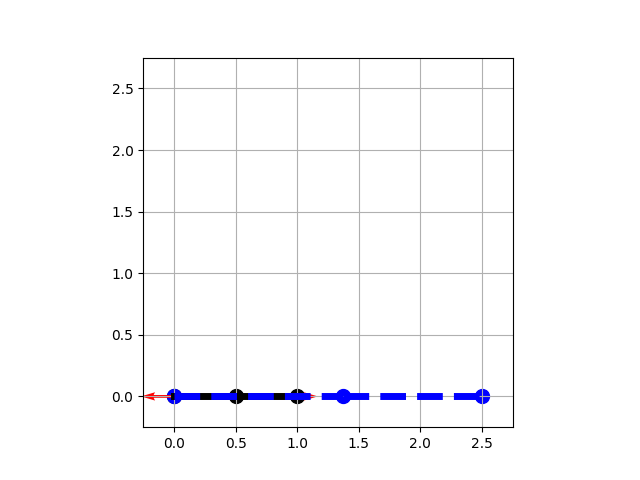

In [143]:
zweiStabProblem = StabFEM(numnp=3,numel=2)
l,A,n,E,F = sp.symbols("l A n E F")
X = sp.Matrix([
    [0,0],
    [l/2,0],
    [l,0]
])
elements = sp.Matrix([
    [0,1],
    [1,2]
])
areas = [A,A]
youngsM = [E,E]
loads = [n,n]

zweiStabProblem.setNodalCoordinates(X)
zweiStabProblem.setElementConnectivity(elements)
zweiStabProblem.setElementData(areas,youngsM,loads)
zweiStabProblem.setDirichletBoundaryCondition([0],[0],[0])
zweiStabProblem.setExternalForces([2],[0],[F])
display(zweiStabProblem.coords)
display(zweiStabProblem.elements)
display(zweiStabProblem.eData)
zweiStabProblem.assembleGlobalMatrix()
zweiStabProblem.assembleRightHandSide()
zweiStabProblem.solveSystem()
display("K=",sp.simplify(zweiStabProblem.Kges))
display("Displacement:",zweiStabProblem.dof)
display("Force:",zweiStabProblem.Fges)

%matplotlib widget
fp = {"l":1.0,"F":1.0,"A":1,"E":1.0,"n":1.0}
fig,ax= zweiStabProblem.plotMesh(fp,deformed=True,scale=10)

## Zweistabproblem 2D

In [ ]:
zweiStabProblem = StabFEM(numnp=3,numel=2,dim=2)
l,A,n,E,F = sp.symbols("l A n E F")
X = sp.Matrix([
    [0,0],
    [l/2,0],
    [l,0]
])
elements = sp.Matrix([
    [0,1],
    [1,2]
])
areas = [A,A]
youngsM = [E,E]
loads = [n,n]

zweiStabProblem.setNodalCoordinates(X)
zweiStabProblem.setElementConnectivity(elements)
zweiStabProblem.setElementData(areas,youngsM,loads)
zweiStabProblem.setDirichletBoundaryCondition([0,0,1,2],[0,1,1,1],[0,0,0,0])
zweiStabProblem.setExternalForces([2],[0],[F])
display(zweiStabProblem.coords)
display(zweiStabProblem.elements)
display(zweiStabProblem.eData)
zweiStabProblem.assembleGlobalMatrix()
zweiStabProblem.assembleRightHandSide()
zweiStabProblem.solveSystem()
display("K=",sp.simplify(zweiStabProblem.Kges))
display("Displacement:",zweiStabProblem.dof)
display("Force:",zweiStabProblem.Fges)

%matplotlib widget
fp = {"l":1.0,"F":1.0,"A":1,"E":1.0,"n":1.0}
fig,ax= zweiStabProblem.plotMesh(fp,deformed=True,scale=10)

Matrix([
[  0, 0],
[l/2, 0],
[  l, 0]])

Matrix([
[0, 1],
[1, 2]])

[{'area': A, 'youngsmodulus': E, 'lineLoad': n},
 {'area': A, 'youngsmodulus': E, 'lineLoad': n}]

'RHS: '

Matrix([
[     0.5*A*l*n],
[0.25*A*l*n + F]])

'Kuu:'

Matrix([
[ 4.0*A*E/sqrt(l**2), -2.0*A*E/sqrt(l**2)],
[-2.0*A*E/sqrt(l**2),  2.0*A*E/sqrt(l**2)]])

'K='

Matrix([
[ 2.0*A*E/sqrt(l**2), 0, -2.0*A*E/sqrt(l**2), 0,                   0, 0],
[                  0, 0,                   0, 0,                   0, 0],
[-2.0*A*E/sqrt(l**2), 0,  4.0*A*E/sqrt(l**2), 0, -2.0*A*E/sqrt(l**2), 0],
[                  0, 0,                   0, 0,                   0, 0],
[                  0, 0, -2.0*A*E/sqrt(l**2), 0,  2.0*A*E/sqrt(l**2), 0],
[                  0, 0,                   0, 0,                   0, 0]])

'Displacement:'

Matrix([
[                                        0, 0],
[0.25*(1.5*A*l*n + 2.0*F)*sqrt(l**2)/(A*E), 0],
[     1.0*(0.5*A*l*n + F)*sqrt(l**2)/(A*E), 0]])

'Force:'

Matrix([
[-1.0*A*l*n - 1.0*F, 0],
[         0.5*A*l*n, 0],
[    0.25*A*l*n + F, 0]])

## Zweistabproblem 2D gedreht

Matrix([
[0,   0],
[0, l/2],
[0,   l]])

Matrix([
[0, 1],
[1, 2]])

[{'area': A, 'youngsmodulus': E, 'lineLoad': n},
 {'area': A, 'youngsmodulus': E, 'lineLoad': n}]

'RHS: '

Matrix([
[     0.5*A*n*sqrt(l**2)],
[0.25*A*n*sqrt(l**2) + F]])

'K='

Matrix([
[0,                 0, 0,                 0, 0,                 0],
[0,  2*A*E/sqrt(l**2), 0, -2*A*E/sqrt(l**2), 0,                 0],
[0,                 0, 0,                 0, 0,                 0],
[0, -2*A*E/sqrt(l**2), 0,  4*A*E/sqrt(l**2), 0, -2*A*E/sqrt(l**2)],
[0,                 0, 0,                 0, 0,                 0],
[0,                 0, 0, -2*A*E/sqrt(l**2), 0,  2*A*E/sqrt(l**2)]])

'Displacement:'

Matrix([
[0,                                             0],
[0, (1.5*A*n*sqrt(l**2) + 2*F)*sqrt(l**2)/(4*A*E)],
[0,     (0.5*A*n*sqrt(l**2) + F)*sqrt(l**2)/(A*E)]])

'Force:'

Matrix([
[0, -1.0*A*n*sqrt(l**2) - F],
[0,      0.5*A*n*sqrt(l**2)],
[0, 0.25*A*n*sqrt(l**2) + F]])

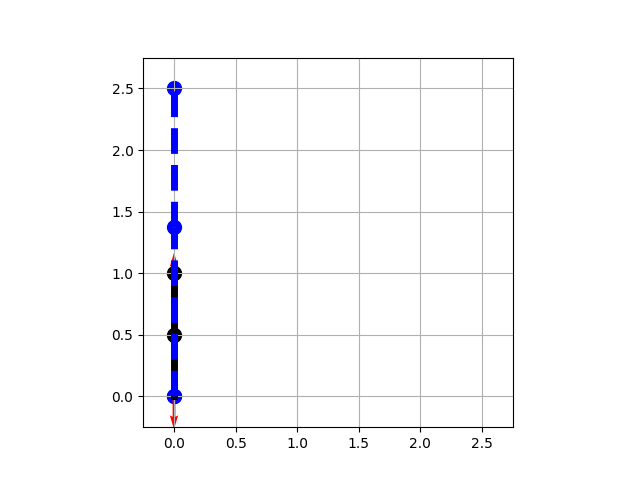

In [20]:
zweiStabProblem = StabFEM(numnp=3,numel=2,dim=2)
l,A,n,E,F = sp.symbols("l A n E F")
a=(sqrt(2)/2)
X = sp.Matrix([
    [0,0],
    [0,l/2],
    [0,l]
])
elements = sp.Matrix([
    [0,1],
    [1,2]
])
areas = [A,A]
youngsM = [E,E]
loads = [n,n]

zweiStabProblem.setNodalCoordinates(X)
zweiStabProblem.setElementConnectivity(elements)
zweiStabProblem.setElementData(areas,youngsM,loads)
zweiStabProblem.setDirichletBoundaryCondition([0,0,1,2],[0,1,0,0],[0,0,0,0])
zweiStabProblem.setExternalForces([2],[1],[F])
display(zweiStabProblem.coords)
display(zweiStabProblem.elements)
display(zweiStabProblem.eData)
zweiStabProblem.assembleGlobalMatrix()
zweiStabProblem.assembleRightHandSide()
zweiStabProblem.solveSystem()
display("K=",sp.simplify(zweiStabProblem.Kges))
display("Displacement:",zweiStabProblem.dof)
display("Force:",zweiStabProblem.Fges)

%matplotlib widget
fp = {"l":1.0,"F":1.0,"A":1,"E":1.0,"n":1.0}
fig,ax= zweiStabProblem.plotMesh(fp,deformed=True,scale=10)

# DreistabProblem Fish Belythschko

In [131]:
dreiStabProblem = StabFEM(numnp=3,numel=2,dim=2)
l,A,n,E,F = sp.symbols("l A n E F")
X = sp.Matrix([
    [l,0],
    [0,0],
    [l,l]
])
elements = sp.Matrix([
    [0,2],
    [1,2]
])
areas = [A,A]
youngsM = [E,E]
loads = [0,0]

dreiStabProblem.setNodalCoordinates(X)
dreiStabProblem.setElementConnectivity(elements)
dreiStabProblem.setElementData(areas,youngsM,loads)
dreiStabProblem.setDirichletBoundaryCondition([0,0,1,1],[0,1,0,1],[0,0,0,0])
dreiStabProblem.setExternalForces([2],[0],[F])
display(dreiStabProblem.coords)
display(dreiStabProblem.elements)
display(dreiStabProblem.eData)
dreiStabProblem.assembleGlobalMatrix()
dreiStabProblem.assembleRightHandSide()
dreiStabProblem.solveSystem()
display("K=",sp.simplify(dreiStabProblem.Kges))
display("Displacement:",dreiStabProblem.dof)
display("Force:",dreiStabProblem.Fges)

Matrix([
[l, 0],
[0, 0],
[l, l]])

Matrix([
[0, 2],
[1, 2]])

[{'area': A, 'youngsmodulus': E, 'lineLoad': 0},
 {'area': A, 'youngsmodulus': E, 'lineLoad': 0}]

'RHS: '

Matrix([
[F],
[0]])

'Kuu:'

Matrix([
[ 0.25*sqrt(2)*A*E/sqrt(l**2),                     -0.25*sqrt(2)*A*E/sqrt(l**2)],
[-0.25*sqrt(2)*A*E/sqrt(l**2), 0.25*sqrt(2)*A*E/sqrt(l**2) + 1.0*A*E/sqrt(l**2)]])

'K='

Matrix([
[0,                   0,                            0,                            0,                            0,                                   0],
[0,  1.0*A*E/sqrt(l**2),                            0,                            0,                            0,                 -1.0*A*E/sqrt(l**2)],
[0,                   0,  0.25*sqrt(2)*A*E/sqrt(l**2), -0.25*sqrt(2)*A*E/sqrt(l**2), -0.25*sqrt(2)*A*E/sqrt(l**2),         0.25*sqrt(2)*A*E/sqrt(l**2)],
[0,                   0, -0.25*sqrt(2)*A*E/sqrt(l**2),  0.25*sqrt(2)*A*E/sqrt(l**2),  0.25*sqrt(2)*A*E/sqrt(l**2),        -0.25*sqrt(2)*A*E/sqrt(l**2)],
[0,                   0, -0.25*sqrt(2)*A*E/sqrt(l**2),  0.25*sqrt(2)*A*E/sqrt(l**2),  0.25*sqrt(2)*A*E/sqrt(l**2),        -0.25*sqrt(2)*A*E/sqrt(l**2)],
[0, -1.0*A*E/sqrt(l**2),  0.25*sqrt(2)*A*E/sqrt(l**2), -0.25*sqrt(2)*A*E/sqrt(l**2), -0.25*sqrt(2)*A*E/sqrt(l**2), A*E*(0.25*sqrt(2) + 1.0)/sqrt(l**2)]])

'Displacement:'

Matrix([
[                                                0,                      0],
[                                                0,                      0],
[2.0*sqrt(2)*(0.25*sqrt(2)*F + F)*sqrt(l**2)/(A*E), 1.0*F*sqrt(l**2)/(A*E)]])

'Force:'

Matrix([
[     0, -1.0*F],
[-1.0*F,  1.0*F],
[     F,      0]])

In [102]:
sp.factor(dreiStabProblem.dof.subs(fp))

Matrix([
[                               0,     0],
[                               0,     0],
[2.0*sqrt(2)*(2.5*sqrt(2) + 10.0), -10.0]])

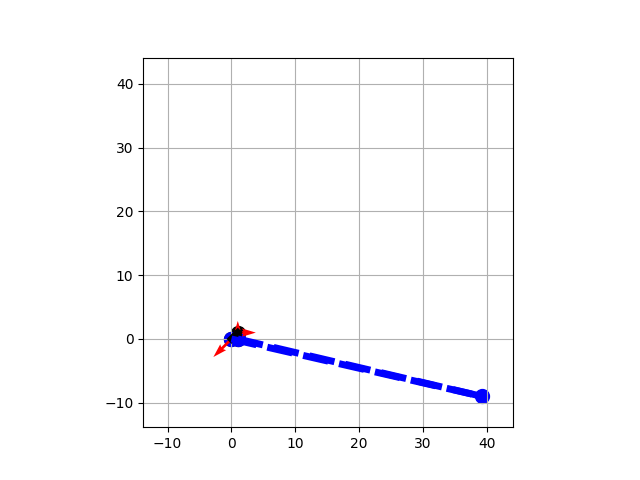

In [101]:
%matplotlib widget
fp = {"l":1.0,"F":10.0,"A":1,"E":1.0}
fig,ax= dreiStabProblem.plotMesh(fp,deformed=True,scale=1)

## Dreistab anders

In [137]:
dreiStabProblem = StabFEM(numnp=3,numel=3,dim=2)
l,A,n,E,F = sp.symbols("l A n E F")
X = sp.Matrix([
    [0,0],
    [l,l/2],
    [2*l,0]
])
elements = sp.Matrix([
    [0,1],
    [1,2],
    [0,2]
])
areas = [A,A,A]
youngsM = [E,E,E]
loads = [0,0,0]

dreiStabProblem.setNodalCoordinates(X)
dreiStabProblem.setElementConnectivity(elements)
dreiStabProblem.setElementData(areas,youngsM,loads)
dreiStabProblem.setDirichletBoundaryCondition([0,0,2,2],[0,1,1,0],[0,0,0,0])
dreiStabProblem.setExternalForces([1],[1],[-F])
display(dreiStabProblem.coords)
display(dreiStabProblem.elements)
display(dreiStabProblem.eData)
dreiStabProblem.assembleGlobalMatrix()
dreiStabProblem.assembleRightHandSide()
dreiStabProblem.solveSystem()
display("K=",sp.simplify(dreiStabProblem.Kges))
display("Displacement:",dreiStabProblem.dof)
display("Force:",dreiStabProblem.Fges)

Matrix([
[  0,   0],
[  l, l/2],
[2*l,   0]])

Matrix([
[0, 1],
[1, 2],
[0, 2]])

[{'area': A, 'youngsmodulus': E, 'lineLoad': 0},
 {'area': A, 'youngsmodulus': E, 'lineLoad': 0},
 {'area': A, 'youngsmodulus': E, 'lineLoad': 0}]

'RHS: '

Matrix([
[ 0],
[-F]])

'Kuu:'

Matrix([
[0.64*sqrt(5)*A*E/sqrt(l**2),                           0],
[                          0, 0.16*sqrt(5)*A*E/sqrt(l**2)]])

'K='

Matrix([
[A*E*(0.5 + 0.32*sqrt(5))/sqrt(l**2), -0.16*sqrt(5)*A*E/sqrt(l**2), -0.32*sqrt(5)*A*E/sqrt(l**2),  0.16*sqrt(5)*A*E/sqrt(l**2),                 -0.5*A*E/sqrt(l**2),                            0],
[       -0.16*sqrt(5)*A*E/sqrt(l**2),  0.08*sqrt(5)*A*E/sqrt(l**2),  0.16*sqrt(5)*A*E/sqrt(l**2), -0.08*sqrt(5)*A*E/sqrt(l**2),                                   0,                            0],
[       -0.32*sqrt(5)*A*E/sqrt(l**2),  0.16*sqrt(5)*A*E/sqrt(l**2),  0.64*sqrt(5)*A*E/sqrt(l**2),                            0,        -0.32*sqrt(5)*A*E/sqrt(l**2), -0.16*sqrt(5)*A*E/sqrt(l**2)],
[        0.16*sqrt(5)*A*E/sqrt(l**2), -0.08*sqrt(5)*A*E/sqrt(l**2),                            0,  0.16*sqrt(5)*A*E/sqrt(l**2),        -0.16*sqrt(5)*A*E/sqrt(l**2), -0.08*sqrt(5)*A*E/sqrt(l**2)],
[                -0.5*A*E/sqrt(l**2),                            0, -0.32*sqrt(5)*A*E/sqrt(l**2), -0.16*sqrt(5)*A*E/sqrt(l**2), A*E*(0.5 + 0.32*sqrt(5))/sqrt(l**2),  0.16*sqrt(5)*A*E/sqrt(l**2)],
[          

'Displacement:'

Matrix([
[0,                                0],
[0, -1.25*sqrt(5)*F*sqrt(l**2)/(A*E)],
[0,                                0]])

'Force:'

Matrix([
[-1.0*F, 0.5*F],
[     0,    -F],
[ 1.0*F, 0.5*F]])

In [138]:
display(dreiStabProblem.dof.subs(fp))
display(dreiStabProblem.Fges.subs(fp))

Matrix([
[0,              0],
[0, -0.075*sqrt(5)],
[0,              0]])

Matrix([
[-3.0,  1.5],
[   0, -3.0],
[ 3.0,  1.5]])

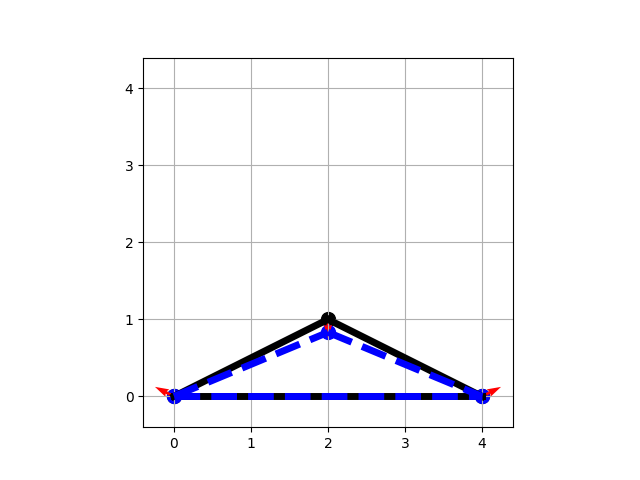

In [139]:
%matplotlib widget
fp = {"l":2.0,"F":3.0,"A":10,"E":10.0}
fig,ax= dreiStabProblem.plotMesh(fp,deformed=True,scale=1)